# Model development

* <b> Training data </b> : Taken from original data set (<b>with</b> `resampling`)
* <b> Testing data </b>: Taken from original data set (without `resampling`)
* <b> Feature imputation </b>: see `data_exploration` notebook
* <b> Stacked models </b>: combines the decisions from multiple models to improve the overall performance. 
    - Base classifiers: `Decision Tree`, `AdaBoost`, `Random Forest`
    - Meta classifer: `Logistic Regression`
    - Predictions from `base classifiers` are stacked to generate a new training set that will be fitted into `meta classifier` to make final predictions. 


In [0]:
colab = True
if colab:
    import sys
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    sys.path.append('drive/My Drive/Colab Notebooks/Income_prediction')
    prefix = 'drive/My Drive/Colab Notebooks/Income_prediction/'
else:
    prefix = ''

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import model
import joblib
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
def build_model(X_train, y_train, X_test, y_test, n_fold, seed):
    modeler = model.Model()
    clf_list = [
                modeler.clf_0, 
                modeler.clf_1, 
                modeler.clf_2, 
                ]
    meta_train, meta_test = modeler.generate_metadata(X_train, y_train, X_test, y_test, clf_list, modeler.generate_oof, n_fold, seed)
    # Fit Meta classifier
    meta_clf = modeler.model_predict(modeler.clf_3, meta_train, y_train, meta_test, y_test, seed)
    print('Start dumping Meta classifier...')
    joblib.dump(meta_clf, 'meta_clf.pkl') 
    print('Done dumping Meta classifier ! \n')
    return meta_clf, meta_train, meta_test
if __name__=='__main__':
    print('Start loading imputed data...')
    X_train = pd.read_csv(prefix+'resampled_data/X_train.csv')
    y_train = pd.read_csv(prefix+'resampled_data/y_train.csv')
    X_test = pd.read_csv(prefix+'resampled_data/X_test.csv')
    y_test = pd.read_csv(prefix+'resampled_data/y_test.csv')
    print('Done loading imputed data! \n')
    print('*'*100) 
    print('*'*100+'\n')
    seed = 1003
    n_fold = 5
    modeler = model.Model()
    colab = False
    url = prefix+'census/census-income.data'
    meta_clf, meta_train, meta_test = build_model(X_train, y_train, X_test, y_test, n_fold, seed)

Start loading imputed data...
Done loading imputed data! 

****************************************************************************************************
****************************************************************************************************

Start getting out of fold set for DecisionTreeClassifier...
Base classifier DecisionTreeClassifier_0: AUC = 0.88 | Accuracy = 0.83% | Precision score: 0.84 | Recall score: 0.83
Base classifier DecisionTreeClassifier_1: AUC = 0.88 | Accuracy = 0.83% | Precision score: 0.84 | Recall score: 0.82
Base classifier DecisionTreeClassifier_2: AUC = 0.88 | Accuracy = 0.84% | Precision score: 0.84 | Recall score: 0.83
Base classifier DecisionTreeClassifier_3: AUC = 0.88 | Accuracy = 0.83% | Precision score: 0.84 | Recall score: 0.83
Base classifier DecisionTreeClassifier_4: AUC = 0.87 | Accuracy = 0.83% | Precision score: 0.83 | Recall score: 0.83
Done getting out of fold set for DecisionTreeClassifier. Time taken = 14.4(s) 

Start getting

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_0: AUC = 0.99 | Accuracy = 0.94% | Precision score: 0.92 | Recall score: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_1: AUC = 0.99 | Accuracy = 0.94% | Precision score: 0.92 | Recall score: 0.95


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_2: AUC = 0.99 | Accuracy = 0.94% | Precision score: 0.92 | Recall score: 0.96


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Base classifier AdaBoostClassifier_3: AUC = 0.99 | Accuracy = 0.94% | Precision score: 0.93 | Recall score: 0.96
Base classifier AdaBoostClassifier_4: AUC = 0.99 | Accuracy = 0.94% | Precision score: 0.92 | Recall score: 0.96
Done getting out of fold set for AdaBoostClassifier. Time taken = 2206.9(s) 

Start getting out of fold set for RandomForestClassifier...


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_0: AUC = 0.97 | Accuracy = 0.88% | Precision score: 0.83 | Recall score: 0.96


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_1: AUC = 0.97 | Accuracy = 0.87% | Precision score: 0.82 | Recall score: 0.96


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_2: AUC = 0.97 | Accuracy = 0.88% | Precision score: 0.83 | Recall score: 0.96


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_3: AUC = 0.97 | Accuracy = 0.88% | Precision score: 0.83 | Recall score: 0.96


drive/My Drive/Colab Notebooks/Income_prediction/model.py:91: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Base classifier RandomForestClassifier_4: AUC = 0.97 | Accuracy = 0.88% | Precision score: 0.82 | Recall score: 0.96
Done getting out of fold set for RandomForestClassifier. Time taken = 125.1(s) 

Start fitting Meta classifier...


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 92.25%
Meta Classifier AUC: 92.41%
Precision score: 0.42
Recall score: 0.63
Done fitting meta classifier. Time taken = 0.6(s) 

Start dumping Meta classifier...
Done dumping Meta classifier ! 



### Base classifier correlation matrix

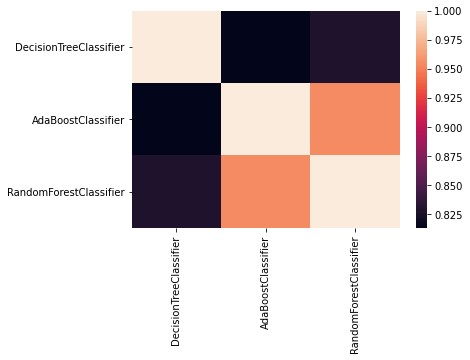

In [0]:
corr = meta_train.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

=> Random Forest and AdaBoost are positively correlated => reduce the variance of base classifers

=> Further improvement: Replace Random Forest or AdaBoost by other algorithms

### Model evaluation

With resampled training data, the performance of the meta model has been improved significantly with regard to Precision score and Accuracy

Most of evaluation metrics remain unchanged, except Recall score (a fall of 0.33, but still good enough)
